In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
data = pd.read_csv("economic_index.csv")

data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
data.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [12]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [14]:
data.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

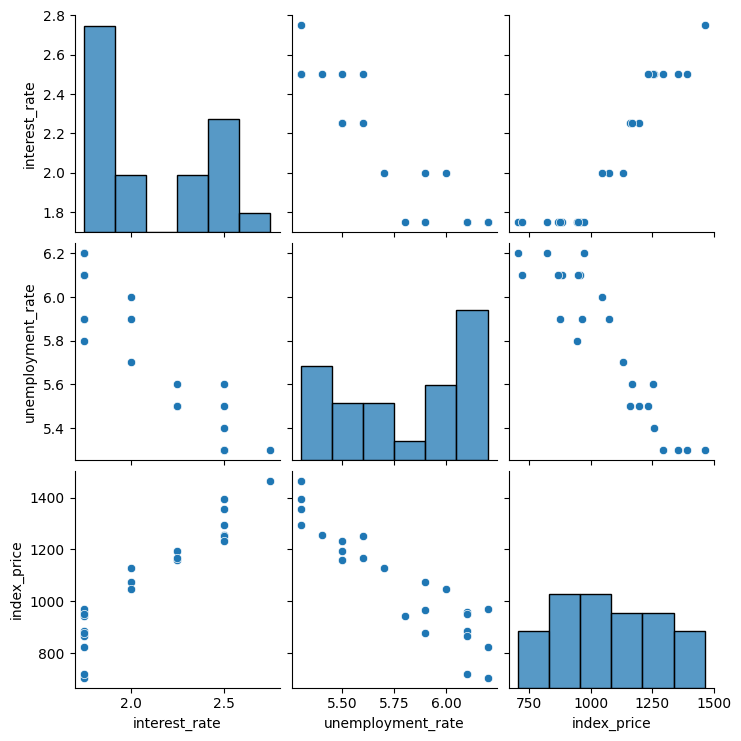

In [15]:
## visualization

import seaborn as sns 
sns.pairplot(data)

In [17]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

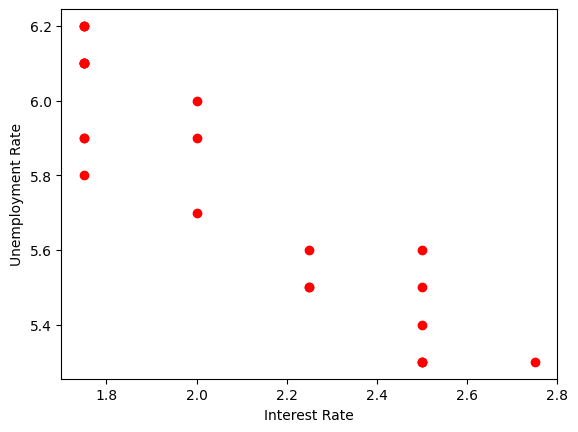

In [20]:
plt.scatter(data["interest_rate"],data["unemployment_rate"],color = "r")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [21]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [23]:
x.head(2)

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3


In [25]:
type(x)

pandas.core.frame.DataFrame

In [24]:
y.head(2)

0    1464
1    1394
Name: index_price, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

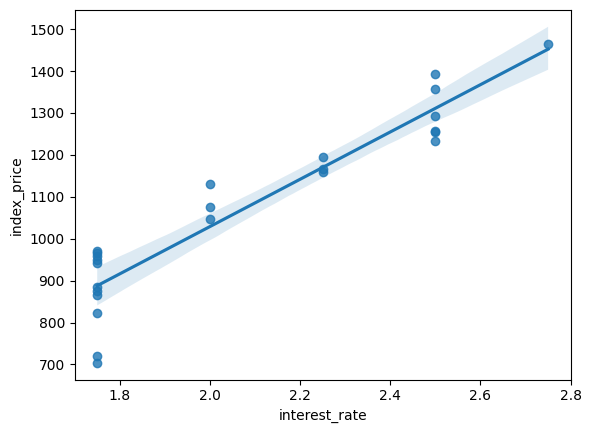

In [30]:
sns.regplot(x="interest_rate",y="index_price", data=data)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

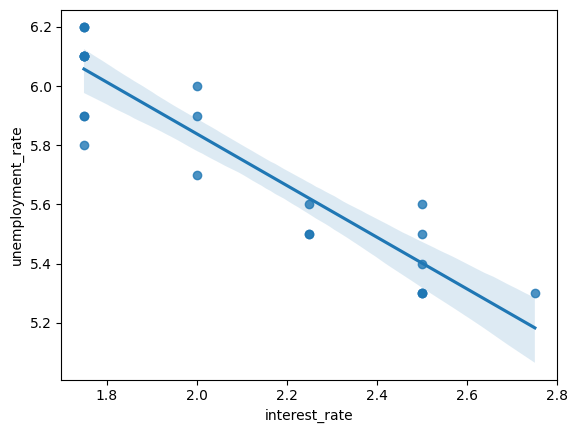

In [31]:
sns.regplot(x="interest_rate",y="unemployment_rate", data=data)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

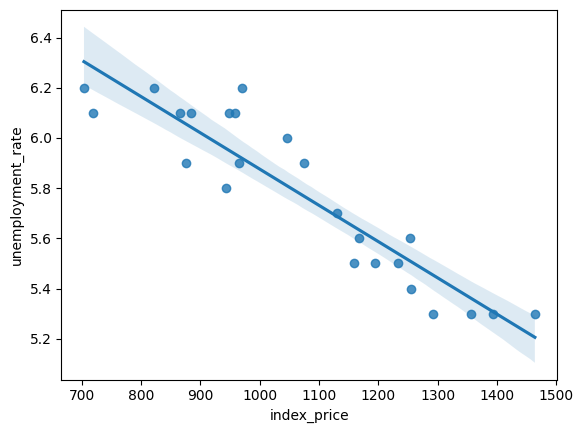

In [32]:
sns.regplot(x="index_price",y="unemployment_rate", data=data)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [36]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [37]:
from sklearn.model_selection import cross_val_score

val_scare = cross_val_score(regression, x_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [40]:
val_scare

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [39]:
np.mean(val_scare)

-5914.828180162386

In [41]:
# prediction

y_pred = regression.predict(x_test)

In [42]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)
print(mae)

5793.762887712569
76.11677139574805
59.935781523235484


In [45]:
## r-square and adjusted r_square

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(f"{(score*100):.2f}%")

82.79%


In [49]:
print(f"Adjusted R-square value is {(1 - (1-score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1))*100:.2f}%")

Adjusted R-square value is 71.32%


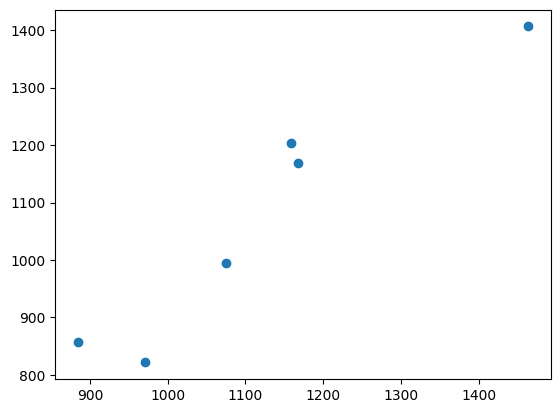

In [50]:
## Assumptions

plt.scatter(y_test,y_pred)

In [51]:
residuals = y_test - y_pred

In [52]:
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

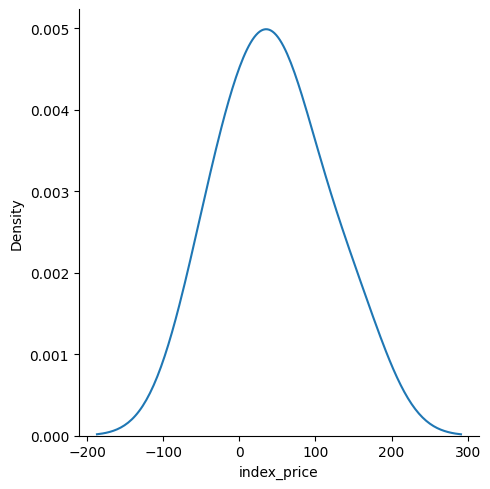

In [53]:
sns.displot(residuals, kind="kde")

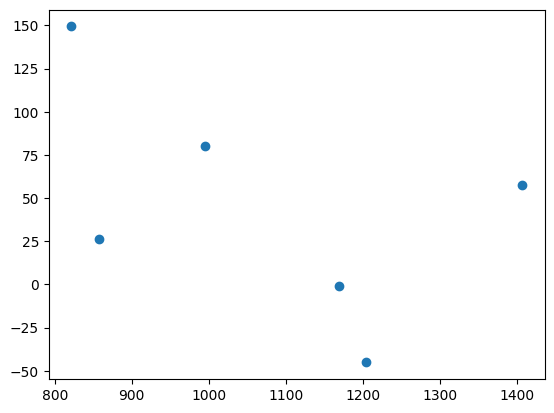

In [55]:
plt.scatter(y_pred,residuals) # uniformly distributed

In [56]:
import statsmodels.api as sm 
model = sm.OLS(y_train,x_train).fit()

In [58]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 09 Jan 2026   Prob (F-statistic):                       0.754
Time:                        09:44:48   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\shara\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [59]:
print(regression.coef_)

[  88.27275507 -116.25716066]
